In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score, recall_score, precision_score

In [2]:


def data_prepration(data): 
    X= data.iloc[:,data.columns != "Class"]
    y= data.iloc[:,data.columns=="Class"]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
    return(X_train,X_test,y_train,y_test)



In [3]:


data = pd.read_csv("creditcard_sampledata.csv")
data.head()



,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


In [5]:
data.isnull().sum().all()

False

In [6]:
data.tail()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7995,7995,172582,-0.942732,0.763164,0.185440,-0.064400,0.519435,-0.824899,0.837716,-0.210690,...,0.190588,1.079226,-0.199087,-0.045535,0.181797,-0.293424,0.285188,0.393999,10.00,0
7996,7996,172599,-0.195044,1.238305,-0.768720,-0.178302,0.582600,-1.282570,0.946855,-0.129767,...,0.365673,1.207021,-0.111128,-0.162594,-0.896012,-0.259841,-0.131265,-0.005010,18.16,0
7997,7997,172617,2.038001,-0.089042,-2.260703,0.095598,0.697565,-1.111463,0.734825,-0.482797,...,0.084980,0.173524,-0.014877,0.543928,0.249404,0.705467,-0.141402,-0.067495,66.30,0
7998,7998,172726,-0.484304,0.035673,-0.151704,-2.219867,-0.664752,0.790599,-0.794190,-1.702391,...,1.631565,0.317559,0.163274,0.227622,-1.011773,-0.094912,0.019251,0.233020,68.00,0
7999,7999,172766,1.975178,-0.616244,-2.628295,-0.406246,2.327804,3.664740,-0.533297,0.842937,...,0.086043,0.543613,-0.032129,0.768379,0.477688,-0.031833,0.014151,-0.066542,25.00,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
Unnamed: 0    8000 non-null int64
Time          8000 non-null int64
V1            8000 non-null float64
V2            8000 non-null float64
V3            8000 non-null float64
V4            8000 non-null float64
V5            8000 non-null float64
V6            8000 non-null float64
V7            8000 non-null float64
V8            8000 non-null float64
V9            8000 non-null float64
V10           8000 non-null float64
V11           8000 non-null float64
V12           8000 non-null float64
V13           8000 non-null float64
V14           8000 non-null float64
V15           8000 non-null float64
V16           8000 non-null float64
V17           8000 non-null float64
V18           8000 non-null float64
V19           8000 non-null float64
V20           8000 non-null float64
V21           8000 non-null float64
V22           8000 non-null float64
V23           8000 non-null float

In [8]:
data.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3999.50000,95357.290375,0.016628,-0.005726,-0.010398,-0.028731,-0.022065,0.000739,0.016121,-0.004941,...,-0.003501,0.028278,0.006422,-0.000855,-0.000284,0.000740,-0.006161,0.005893,89.669246,0.002125
std,2309.54541,46956.240862,1.899212,1.545809,1.477050,1.426184,1.401964,1.332905,1.305012,1.174568,...,0.678019,0.714746,0.553929,0.606846,0.513374,0.485101,0.394584,0.348770,260.188804,0.046052
min,0.00000,64.000000,-29.973363,-29.198899,-19.947726,-5.416315,-40.427726,-7.810116,-21.234463,-26.069936,...,-13.950186,-4.910197,-12.667179,-2.814898,-3.223535,-1.511259,-5.809357,-3.693525,0.000000,0.000000
25%,1999.75000,55189.750000,-0.915243,-0.610001,-0.893566,-0.903137,-0.714806,-0.790640,-0.560447,-0.215935,...,-0.221765,-0.519427,-0.159989,-0.345288,-0.311490,-0.327823,-0.071358,-0.052957,5.990000,0.000000
50%,3999.50000,85758.000000,0.025737,0.040064,0.165369,-0.035525,-0.076317,-0.282476,0.043119,0.019278,...,-0.026597,0.031274,-0.008716,0.038126,0.023790,-0.061720,0.000514,0.011239,22.855000,0.000000
75%,5999.25000,139042.750000,1.321858,0.784179,0.991859,0.752604,0.601602,0.403259,0.581711,0.331131,...,0.191495,0.549468,0.144751,0.440633,0.344371,0.246298,0.086333,0.076835,78.432500,0.000000
max,7999.00000,172766.000000,2.373022,11.447082,3.985446,9.074932,13.815072,23.917837,44.054461,9.561121,...,14.507345,4.222704,19.228169,3.577753,2.520869,2.693658,5.352193,15.649134,10199.440000,1.000000


In [27]:
data['Class'].value_counts()

0    7983
1      17
Name: Class, dtype: int64

In [28]:
data['Class'].value_counts(normalize=True)

0    0.997875
1    0.002125
Name: Class, dtype: float64

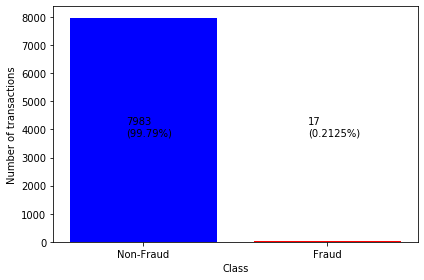

In [16]:


plt.bar(['Non-Fraud','Fraud'], data['Class'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(data['Class'].value_counts()[0], 
                                         data['Class'].value_counts()[0]/data['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(data['Class'].value_counts()[1], 
                                         data['Class'].value_counts()[1]/data['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()



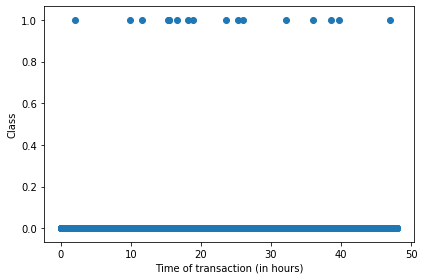

In [17]:


plt.scatter(data['Time']/(60*60), data['Class'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Class')

plt.tight_layout()
plt.show()



Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  905  (11.31%)


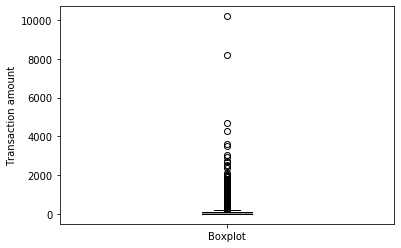

In [9]:


plt.boxplot(data['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount1 = data[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount1,[25,75])
iqr1 = q3 - q1
lower_bound = q1 -(1.5 * iqr1) 
upper_bound = q3 +(1.5 * iqr1)

print('Number of outliers below the lower bound: ', amount1[amount1['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount1[amount1['Amount'] < lower_bound].count()[0] / amount1['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount1[amount1['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount1[amount1['Amount'] > upper_bound].count()[0] / amount1['Amount'].count() * 100))



In [21]:
data[data['Class']==1].where(data['Amount']>upper_bound).count()['Amount']

3

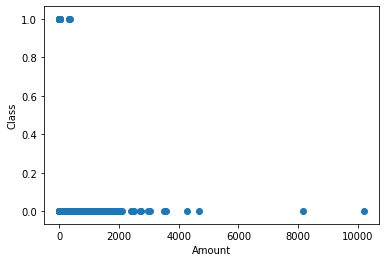

In [22]:


plt.scatter(data['Amount'], data['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()



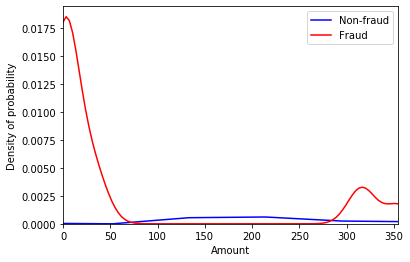

In [10]:


target_2 = data.loc[data['Class'] == 0]
target_3 = data.loc[data['Class'] == 1]
ax3=sns.distplot(target_2[['Amount']], hist=False, color='b', label='Non-fraud')
ax4=sns.distplot(target_3[['Amount']], hist=False, color='r', label='Fraud')
ax3.set_xlim(0, max(data[data['Class']==1]['Amount']))
ax4.set_xlim(0, max(data[data['Class']==1]['Amount']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.show()



In [26]:
data.loc[data['Class'] == 1]['Amount'].describe()

count     17.000000
mean      65.287647
std      126.525162
min        0.000000
25%        0.830000
50%        1.000000
75%       31.910000
max      354.330000
Name: Amount, dtype: float64

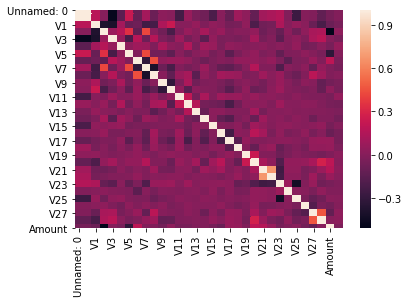

In [11]:
heatmap1 = sns.heatmap(data.corr(method='spearman'))

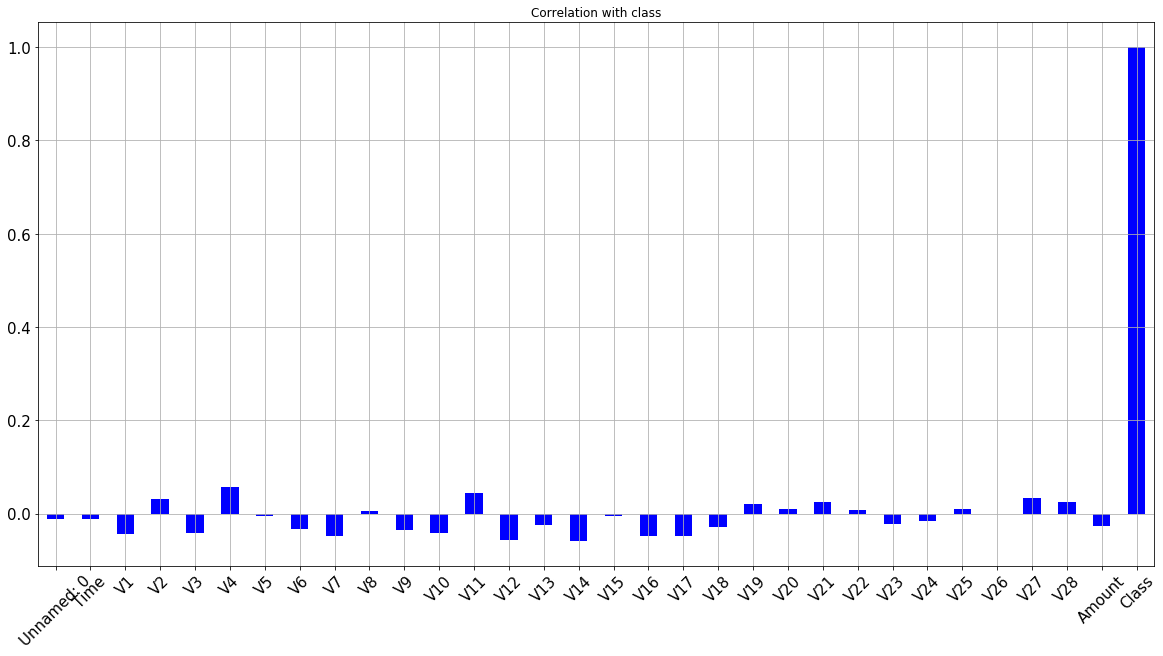

In [12]:


data.corrwith(data.Class, method='spearman').plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True, color=['blue'])
plt.show()



In [30]:
data['Class'].value_counts()[0]

7983

In [31]:
data['Class'].value_counts()[1]

17

In [32]:


data['normalAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()



,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalAmount
0,0,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,0,-0.211280
1,1,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,0,-0.133293
2,2,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,0,-0.320669
3,3,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,0,-0.310829
4,4,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,-0.372442,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,0,-0.306217


In [16]:
X_train, X_test, y_train, y_test = data_prepration(data)

In [18]:


logreg1 = LogisticRegression()
y_pred1 = logreg1.fit(X_train, y_train).predict(X_test)
y_true1 = y_test

precision1 = precision_score(y_true1, y_pred1)
recall1 = recall_score(y_true1, y_pred1)
average_precision = average_precision_score(y_true1, y_pred1)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('Precision score: {0:0.2f}'.format(
      precision1))
print('Recall score: {0:0.2f}'.format(
      recall1))



C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average precision-recall score: 0.40
Precision score: 1.00
Recall score: 0.40


Text(0.5, 1.0, '2-class Precision-Recall curve: AUC=0.40')

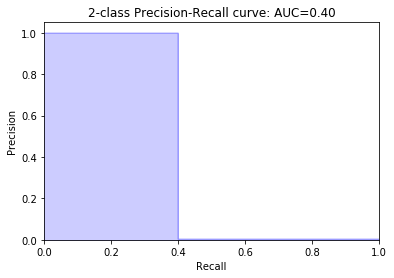

In [19]:


precision1, recall1, _ = precision_recall_curve(y_true1, y_pred1)

plt.step(recall1, precision1, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall1, precision1, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))



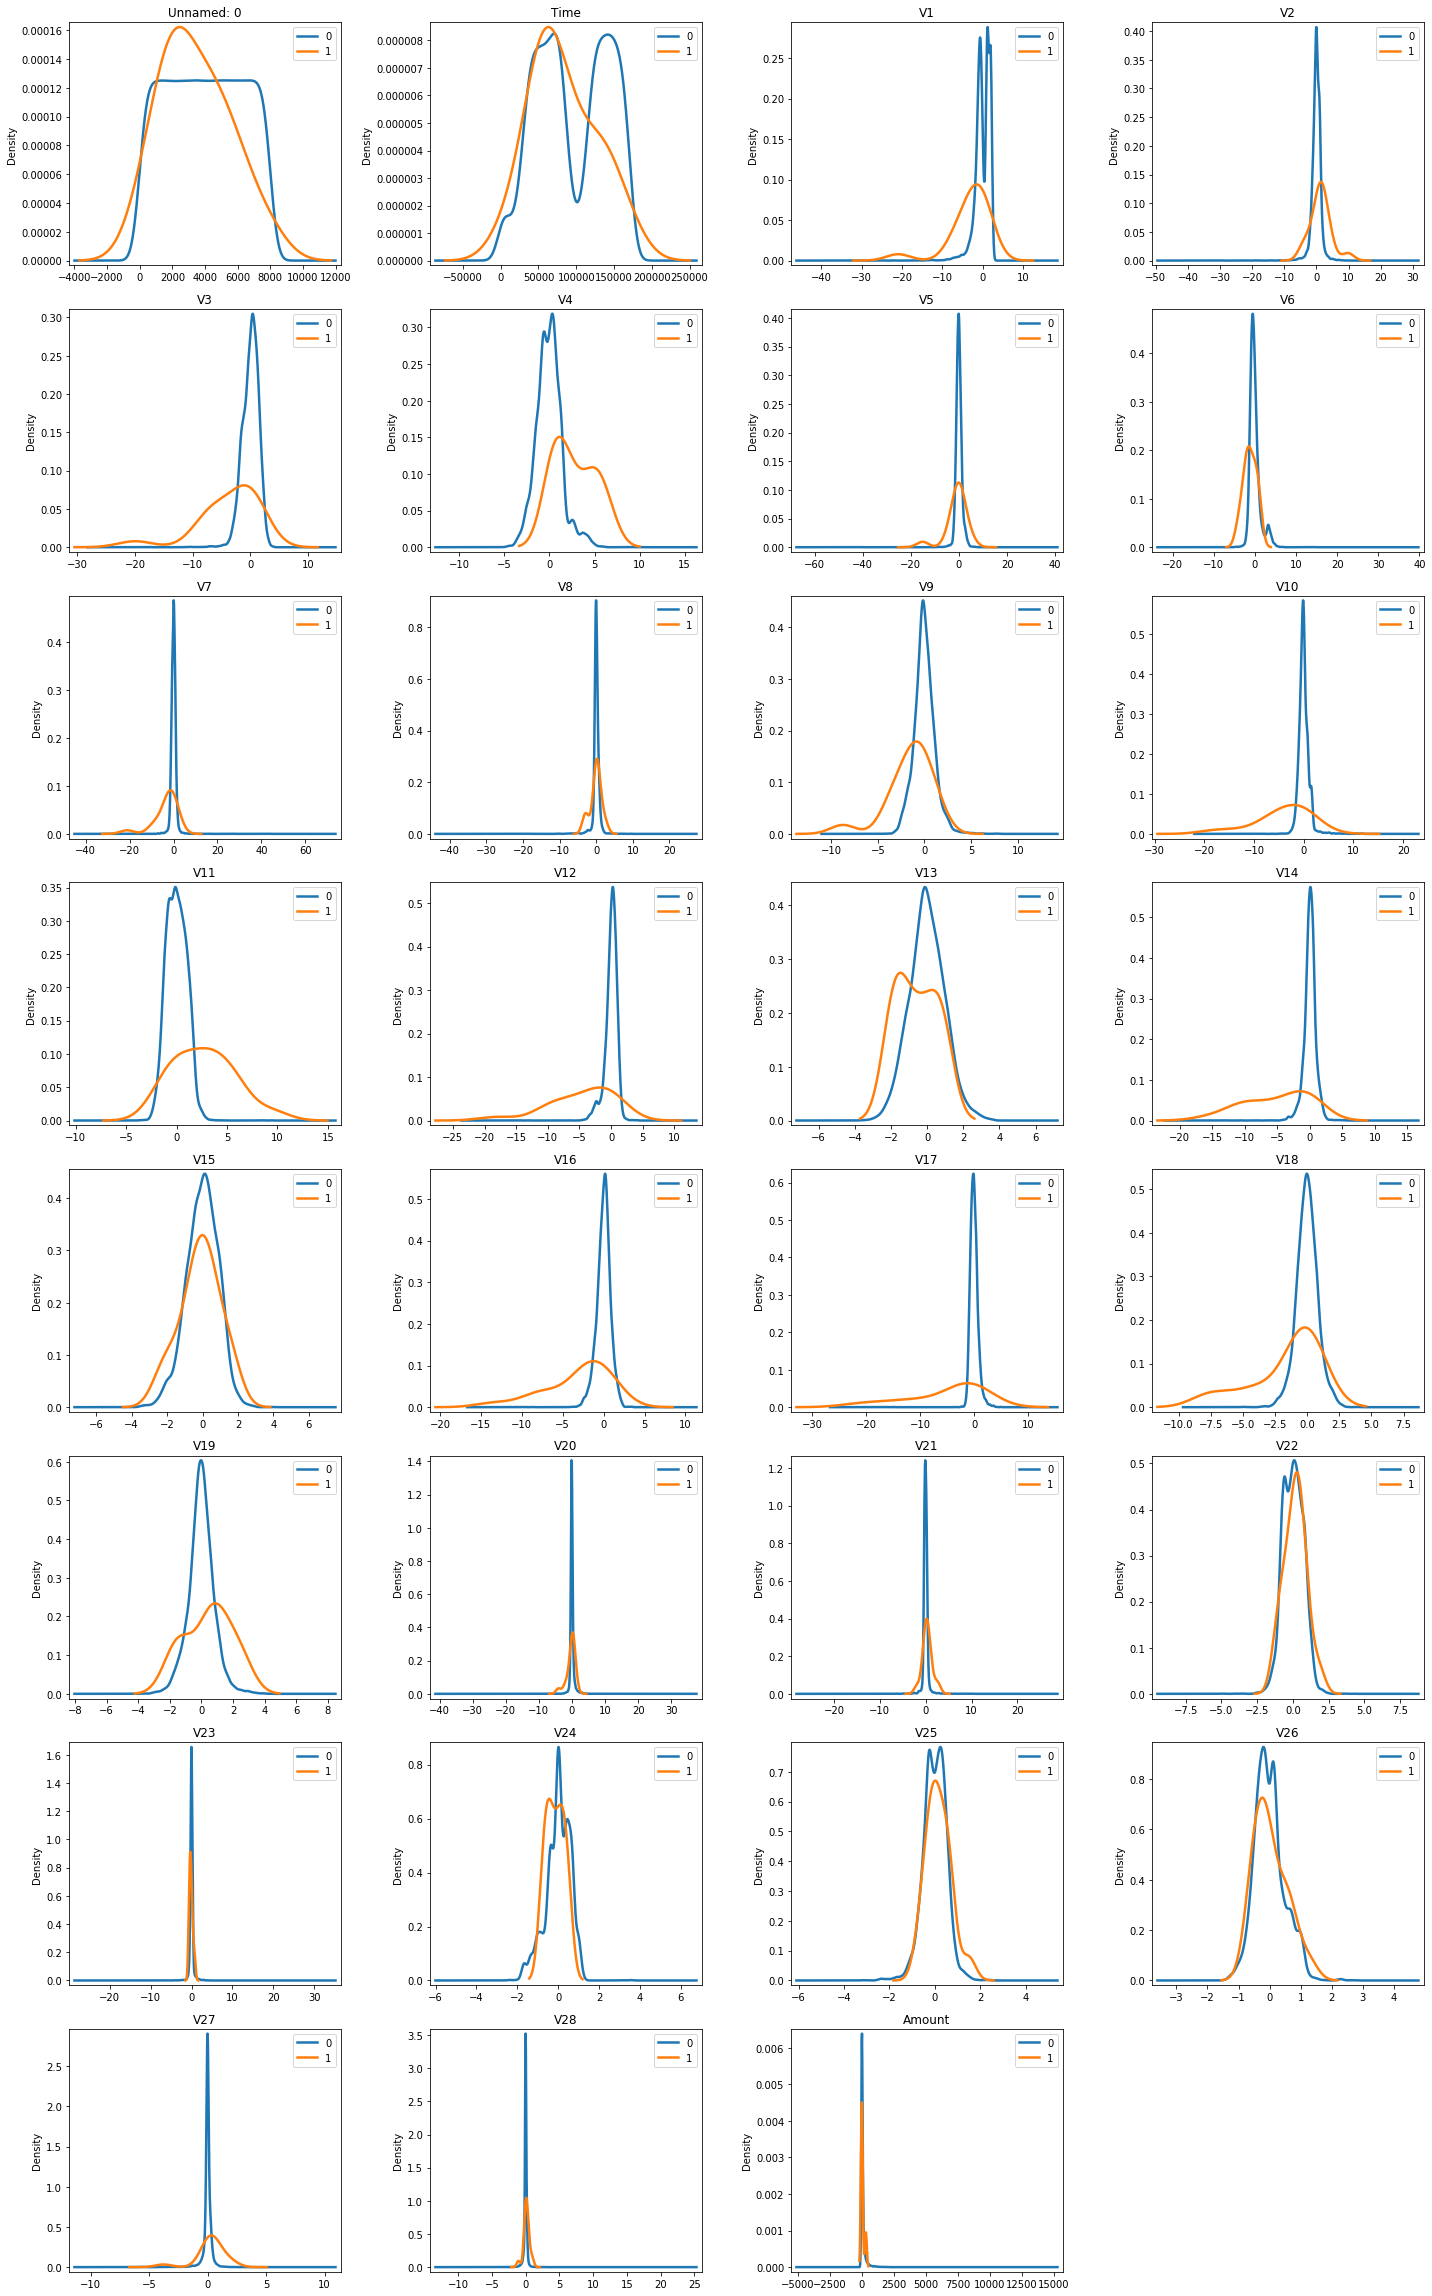

In [21]:
plt.figure(figsize=(20,32))
for plot, feat in enumerate(data.columns[:-1]):
    plt.subplot(8, 4, (plot+1))
    title1 = str(feat)
    
    temp_df1 = pd.concat([data[feat], data['Class']], axis='columns')
    temp_df1.groupby(by='Class')[feat].plot(kind='kde', alpha=1, legend='best', lw=2.5)
    plt.title(title1)
    plt.tight_layout(); 
    plt.margins(0.02)

In [22]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)
y_train = X_train['Class']
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train.shape

(6400, 31)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=RANDOM_SEED)

In [25]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV

dt_classifier1 = DecisionTreeClassifier()  

param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

dt_classifier_g = GridSearchCV(estimator = dt_classifier1, param_grid = param_grid , scoring = 'recall')

dt_classifier_g.fit(X_train, y_train)
best_parameters1 = dt_classifier_g.best_estimator_
print('The best parameters for using this model is', best_parameters1)
y_pred1 = dt_classifier_g.predict(X_test)

C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The best parameters for using this model is DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       0.00      0.00      0.00         0

    accuracy                           1.00      1600
   macro avg       0.50      0.50      0.50      1600
weighted avg       1.00      1.00      1.00      1600



C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [16]:
from sklearn.linear_model import LogisticRegression

log_cfl = LogisticRegression()

log_cfl.fit(X_train, y_train)

param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(X_train, y_train)

best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)


C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   28.5s finished
C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The best parameters for using this model is {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}


C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:


log_cfl = LogisticRegression(C= 0.1, class_weight= 'balanced', penalty= 'l1')
log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
print(classification_report(y_test, y_pred))



C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1600
           1       0.00      0.00      0.00         0

    accuracy                           0.94      1600
   macro avg       0.50      0.47      0.48      1600
weighted avg       1.00      0.94      0.97      1600



C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
